In [1]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

# Data hotel bookings

## Hotel resort

In [23]:
hotel_booking_resort = pd.read_csv('dbs/hotel_booking/H1.csv')
hotel_booking_resort.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [24]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_resort.to_sql('hotel_booking_resort', con=conn_sql, if_exists='replace', index=False)

#reload the inserted data
hotel_booking_resort = pd.read_sql('SELECT * FROM hotel_booking_resort', conn_sql)
hotel_booking_resort.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
conn_sql.commit()

In [26]:
#shape and dimension of dataframe hotel_booking
print('Shape: ', hotel_booking_resort.shape)
print('Dimensions: ', hotel_booking_resort.ndim)

Shape:  (40060, 31)
Dimensions:  2


In [27]:
#checking types of data contained in dataframe
hotel_booking_resort.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [28]:
#check if any column has missing/nan values

hotel_booking_resort.isnull().values.any()
hotel_booking_resort[hotel_booking_resort.isnull().any(axis=1)]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
30,0,118,2015,July,27,1,4,10,1,0,...,No Deposit,NULL,NULL,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,1,0,2016,February,8,15,0,0,0,0,...,No Deposit,NULL,383,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,1,8,2016,July,30,21,0,1,1,0,...,No Deposit,NULL,204,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,1,39,2016,August,36,30,0,5,2,0,...,No Deposit,NULL,NULL,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,1,0,2016,October,42,13,0,1,1,0,...,No Deposit,NULL,457,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26473,0,19,2016,July,31,28,1,3,2,0,...,No Deposit,NULL,NULL,0,Transient,288.1,0,3,Check-Out,2016-08-01
28460,0,0,2016,October,41,3,1,0,2,0,...,No Deposit,NULL,NULL,0,Transient,87.0,1,0,Check-Out,2016-10-04
31085,0,0,2016,December,51,14,0,0,1,0,...,No Deposit,NULL,178,0,Transient,0.0,0,0,Check-Out,2016-12-14
31594,0,31,2016,December,53,30,0,2,1,0,...,No Deposit,NULL,NULL,0,Transient-Party,222.5,0,1,Check-Out,2017-01-01


In [29]:
hotel_booking_resort.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [12]:
#NOT USED
cur = conn_sql.cursor()
nums = [0, 1]
cur.execute('Select sum(case when IsCanceled = 1 then 1 else 0 end) AS canceled, sum(case when IsCanceled = 0 then 1 else 0 end) AS notCanceled from hotel_booking_resort')
results = [res for t in cur.fetchall() for res in t]
print(results)

[33102, 46228]


In [30]:
cancelations = pd.read_sql('Select sum(case when IsCanceled = 1 then 1 else 0 end) AS canceled, sum(case when IsCanceled = 0 then 1 else 0 end) AS notCanceled from hotel_booking_resort', conn_sql)
cancelations

,canceled,notCanceled
0,11122,28938


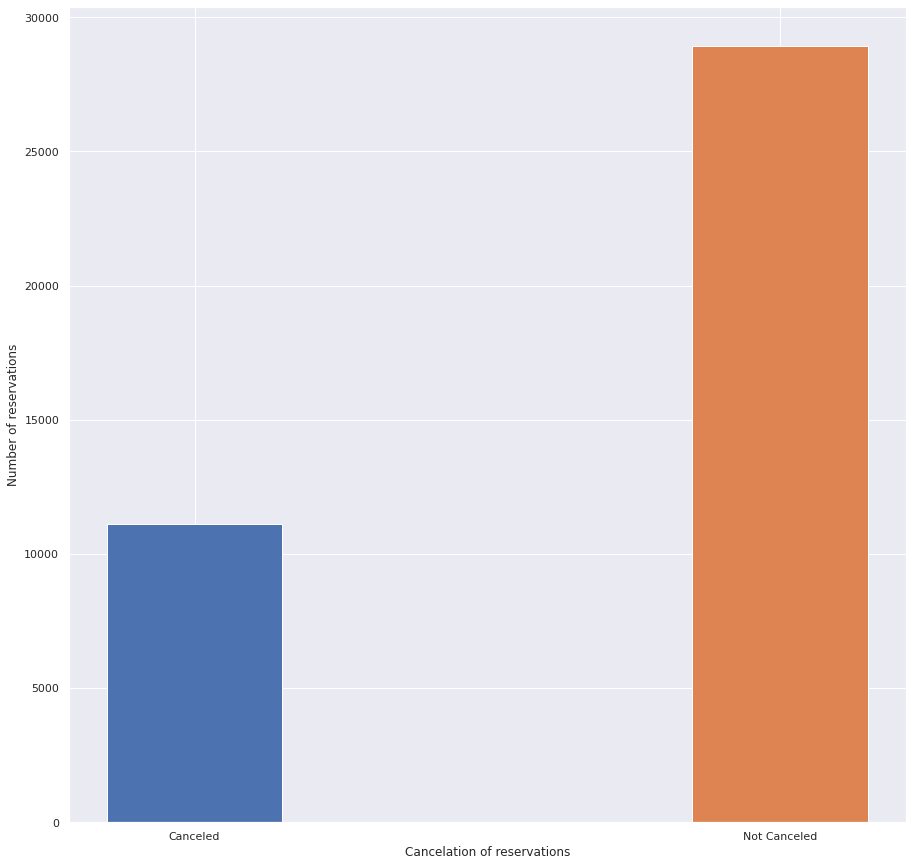

In [31]:
plt.figure()
plt.bar('Canceled', cancelations.canceled, width=0.3)
plt.bar('Not Canceled', cancelations.notCanceled, width=0.3)
plt.ylabel('Number of reservations')
plt.xlabel('Cancelation of reservations')
plt.show()

In [32]:
#Columns: Meal, ReservedRoomType, AssignedRoomType, DepositType, CustomerType - need to be changed to integer columns as scikit is used only with integers with LabelEncoder

from sklearn.preprocessing import LabelEncoder

categorical_features_hr = ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType']
le = LabelEncoder()

for i in range(len(categorical_features_hr)):
    new = le.fit_transform(hotel_booking_resort[categorical_features_hr[i]])
    hotel_booking_resort[categorical_features_hr[i]] = new

hotel_booking_resort.head(5) 


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,0,NULL,NULL,0,2,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,0,NULL,NULL,0,2,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,0,NULL,NULL,0,2,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,0,304,NULL,0,2,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,0,240,NULL,0,2,98.0,0,1,Check-Out,2015-07-03


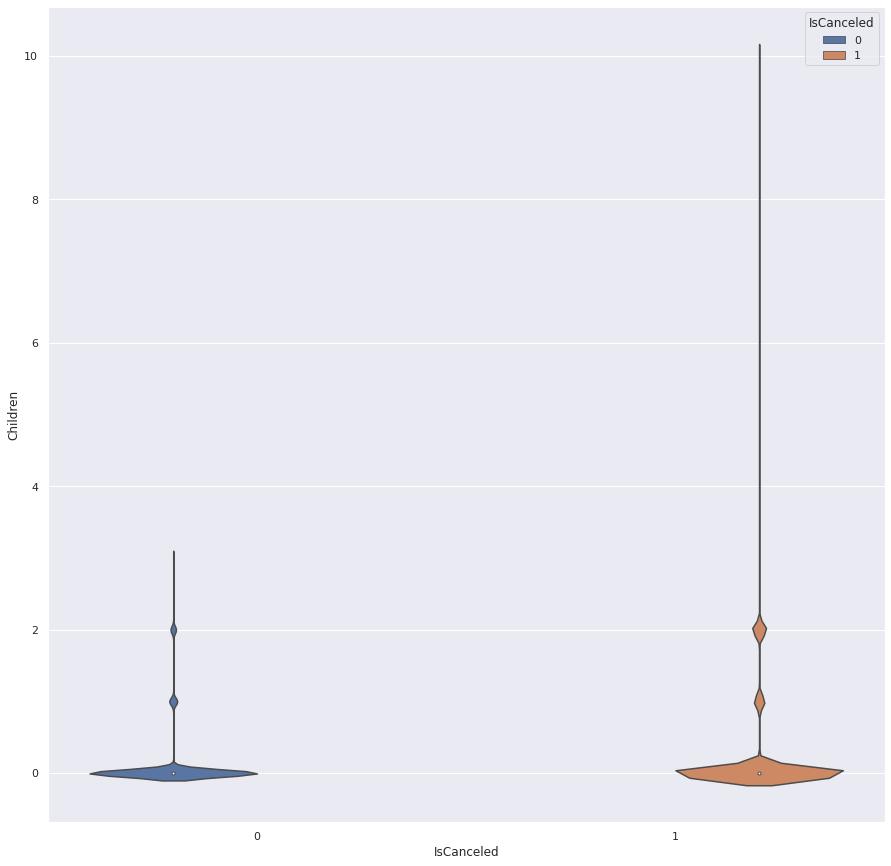

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
# plotting the violinplot to see how some columns affect the cancelation - helps us determine which columns to drop from final predictions (irrelevant ones)

#sns.violinplot(x="IsCanceled",y="ArrivalDateMonth", hue="IsCanceled", data=hotel_booking_resort);
#sns.violinplot(x="IsCanceled",y="DaysInWaitingList", hue="IsCanceled", data=hotel_booking_resort);
#sns.violinplot(x="IsCanceled",y="ArrivalDateWeekNumber", hue="IsCanceled", data=hotel_booking_resort);
#sns.violinplot(x="IsCanceled",y="LeadTime", hue="IsCanceled", data=hotel_booking_resort); #relevant
#sns.violinplot(x="IsCanceled",y="RequiredCarParkingSpaces", hue="IsCanceled", data=hotel_booking_resort); #relevant for 0
sns.violinplot(x="IsCanceled",y="Children", hue="IsCanceled", data=hotel_booking_resort);

plt.show()

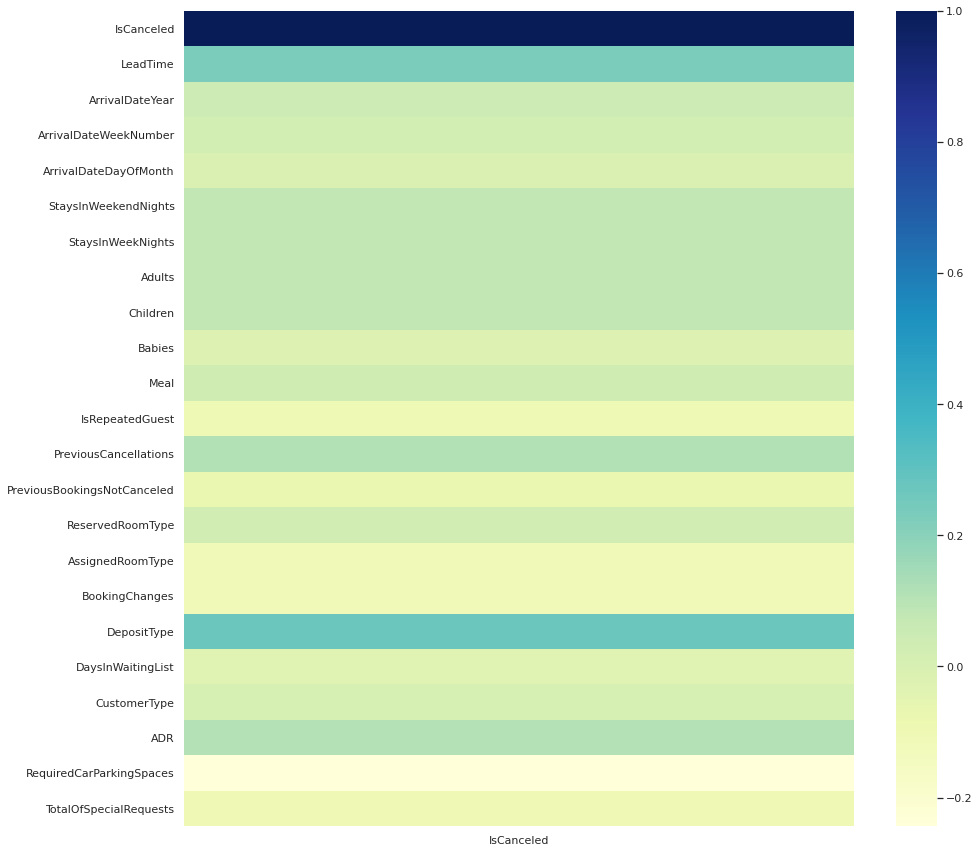

In [34]:
import seaborn as sns
correlations_booking_resort = hotel_booking_resort.corr()
sns.heatmap(correlations_booking_resort[['IsCanceled']], cmap="YlGnBu")
plt.show()

In [35]:
#we will drop some uneccesary columns 
hotel_booking_resort.drop(['Agent', 'ArrivalDateDayOfMonth', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateYear', 'Company', 'Country', 'DistributionChannel', 'MarketSegment', 'ReservationStatus', 'ReservationStatusDate'], inplace=True, axis=1)
hotel_booking_resort.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,342,0,0,2,0,0,0,0,0,0,2,2,3,0,0,2,0.0,0,0
1,0,737,0,0,2,0,0,0,0,0,0,2,2,4,0,0,2,0.0,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,2,0,0,0,2,75.0,0,0
3,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,75.0,0,0
4,0,14,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,98.0,0,1


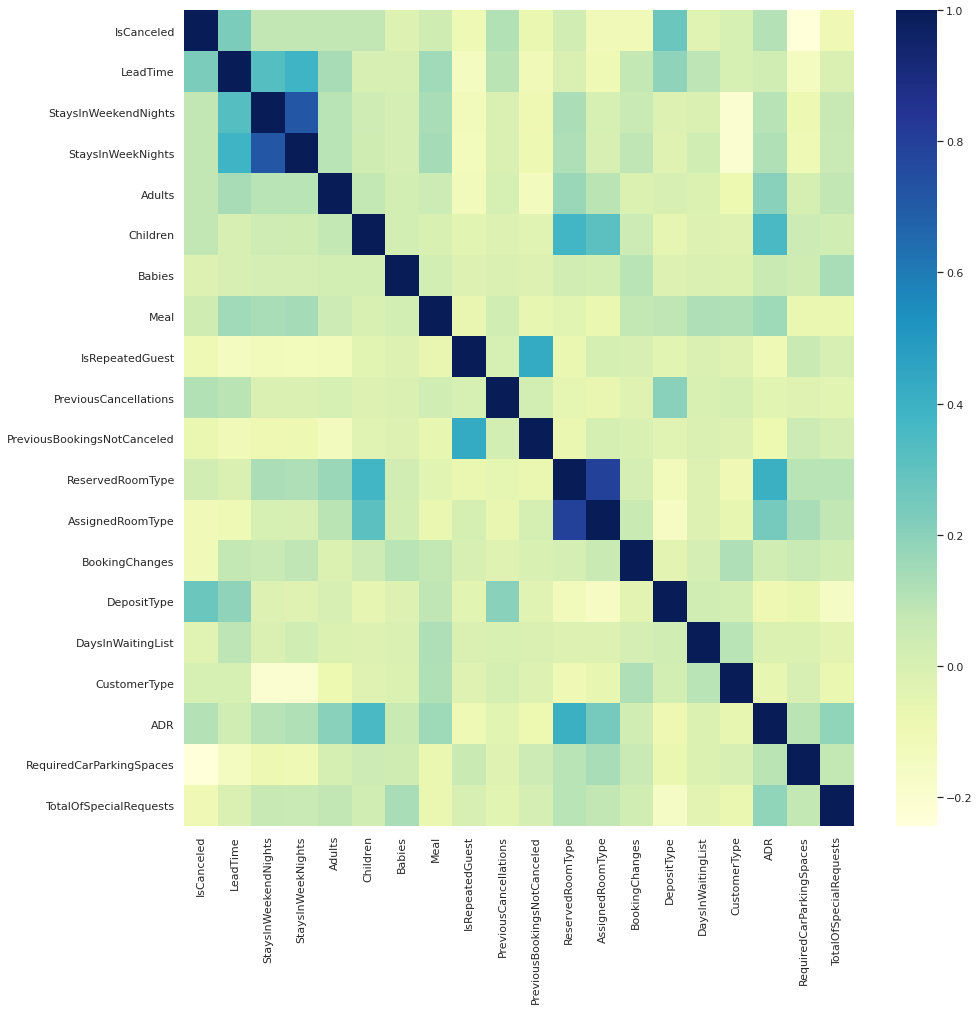

In [36]:
import seaborn as sns
correlations_booking = hotel_booking_resort.corr()
sns.heatmap(correlations_booking, cmap="YlGnBu")
plt.show()

In [37]:
hotel_booking_resort.isnull().sum()

IsCanceled                     0
LeadTime                       0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

In [38]:
hotel_booking_resort.dtypes

IsCanceled                       int64
LeadTime                         int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                         int64
Babies                           int64
Meal                             int64
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                 int64
AssignedRoomType                 int64
BookingChanges                   int64
DepositType                      int64
DaysInWaitingList                int64
CustomerType                     int64
ADR                            float64
RequiredCarParkingSpaces         int64
TotalOfSpecialRequests           int64
dtype: object

In [39]:
#we save the clean stroke to the db

conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_resort.to_sql('hotel_booking_resort_clean', con=conn_sql, if_exists='replace', index=False)
hotel_booking_resort_c = pd.read_sql('SELECT * FROM hotel_booking_resort_clean', conn_sql)
hotel_booking_resort_c.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,342,0,0,2,0,0,0,0,0,0,2,2,3,0,0,2,0.0,0,0
1,0,737,0,0,2,0,0,0,0,0,0,2,2,4,0,0,2,0.0,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,2,0,0,0,2,75.0,0,0
3,0,13,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,75.0,0,0
4,0,14,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,98.0,0,1


In [40]:
hotel_booking_resort_c.columns

Index(['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'Meal', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests'],
      dtype='object')

In [41]:
#after preprocessing we define our target and features
X = hotel_booking_resort_c[['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 
      'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges',
    'DepositType', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']]
y = hotel_booking_resort_c['IsCanceled']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time


In [44]:
#Training the models and measuring duration
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc


/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [45]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 0.629
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      8745
           1       0.63      0.39      0.48      3273

    accuracy                           0.77     12018
   macro avg       0.72      0.65      0.67     12018
weighted avg       0.75      0.77      0.75     12018

GaussianNB: 
 time: 0.042
              precision    recall  f1-score   support

           0       0.95      0.36      0.52      8745
           1       0.36      0.95      0.52      3273

    accuracy                           0.52     12018
   macro avg       0.65      0.65      0.52     12018
weighted avg       0.79      0.52      0.52     12018

LinearSVC: 
 time: 5.322
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      8745
           1       0.53      0.16      0.25      3273

    accuracy                           0.73     12018
   macro avg       0.64      0.55      0.5

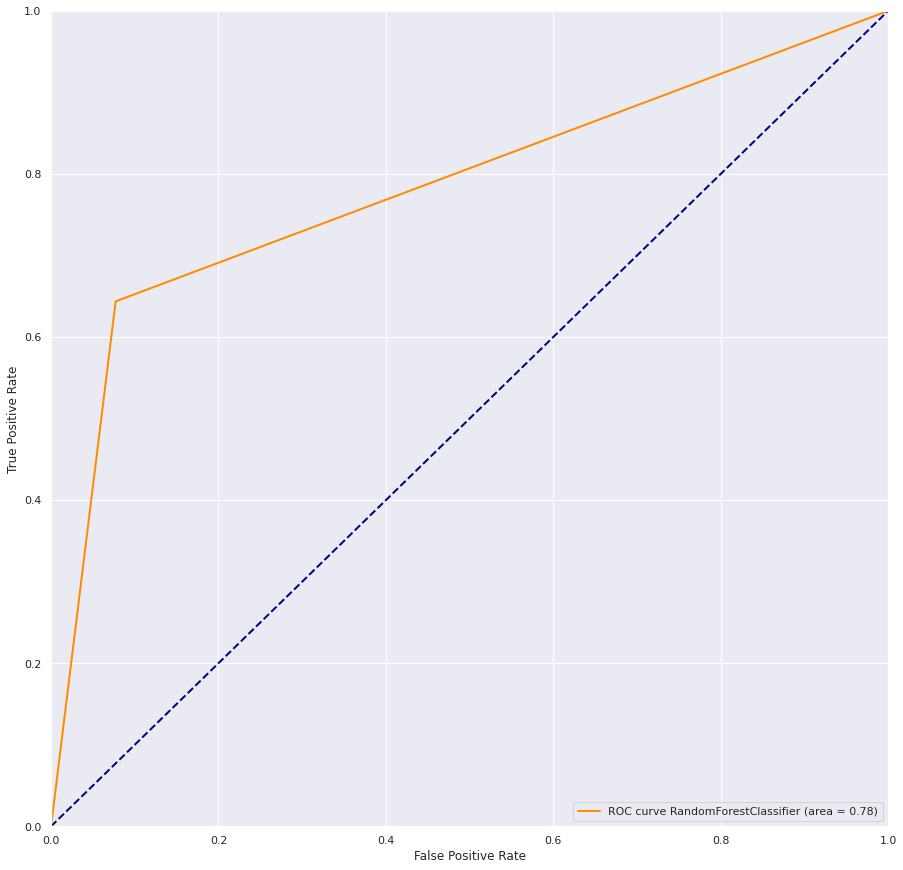

In [53]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_nb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Hotel city

In [90]:
hotel_booking_city = pd.read_csv('dbs/hotel_booking/H2.csv')
hotel_booking_city.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [91]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_city.to_sql('hotel_booking_city', con=conn_sql, if_exists='replace', index=False)

#reload the inserted data
hotel_booking_city = pd.read_sql('SELECT * FROM hotel_booking_city', conn_sql)
hotel_booking_city.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [92]:
conn_sql.commit()

In [93]:
#shape and dimension of dataframe hotel_booking
print('Shape: ', hotel_booking_city.shape)
print('Dimensions: ', hotel_booking_city.ndim)

Shape:  (79330, 31)
Dimensions:  2


In [94]:
#checking types of data contained in dataframe
hotel_booking_city.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

In [95]:
#check if any column has missing/nan values

hotel_booking_city.isnull().values.any()
hotel_booking_city[hotel_booking_city.isnull().any(axis=1)]

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
540,1,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
607,1,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
619,1,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NULL,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
1100,1,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Canceled,2015-08-09
4831,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4832,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4833,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4834,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4835,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16
4836,1,193,2015,October,42,15,0,3,2,0.0,...,Non Refund,12,NULL,0,Transient,65.0,0,0,Canceled,2015-09-16


In [96]:
hotel_booking_city.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [97]:
cancelations = pd.read_sql('Select sum(case when IsCanceled = 1 then 1 else 0 end) AS canceled, sum(case when IsCanceled = 0 then 1 else 0 end) AS notCanceled from hotel_booking_city', conn_sql)
cancelations

,canceled,notCanceled
0,33102,46228


In [77]:
plt.rcParams.update(plt.rcParamsDefault)

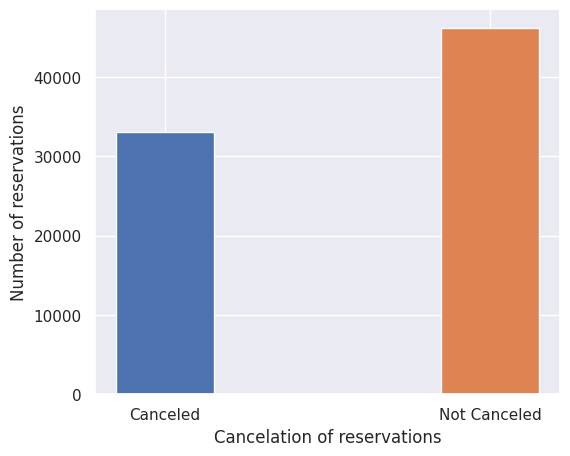

In [98]:
plt.figure(figsize=(6, 5))
plt.bar('Canceled', cancelations.canceled, width=0.3)
plt.bar('Not Canceled', cancelations.notCanceled, width=0.3)
plt.ylabel('Number of reservations')
plt.xlabel('Cancelation of reservations')
plt.show()

In [99]:
#Columns: Meal, ReservedRoomType, AssignedRoomType, DepositType, CustomerType - need to be changed to integer columns as scikit is used only with integers with LabelEncoder

from sklearn.preprocessing import LabelEncoder

categorical_features_hr = ['Meal', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType']
le = LabelEncoder()

for i in range(len(categorical_features_hr)):
    new = le.fit_transform(hotel_booking_city[categorical_features_hr[i]])
    hotel_booking_city[categorical_features_hr[i]] = new
    
hotel_booking_city.head(5) 

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,0,6,NULL,0,2,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,0,9,NULL,0,2,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,0,9,NULL,0,2,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,0,9,NULL,0,2,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,0,9,NULL,0,2,76.5,0,1,Canceled,2015-04-02


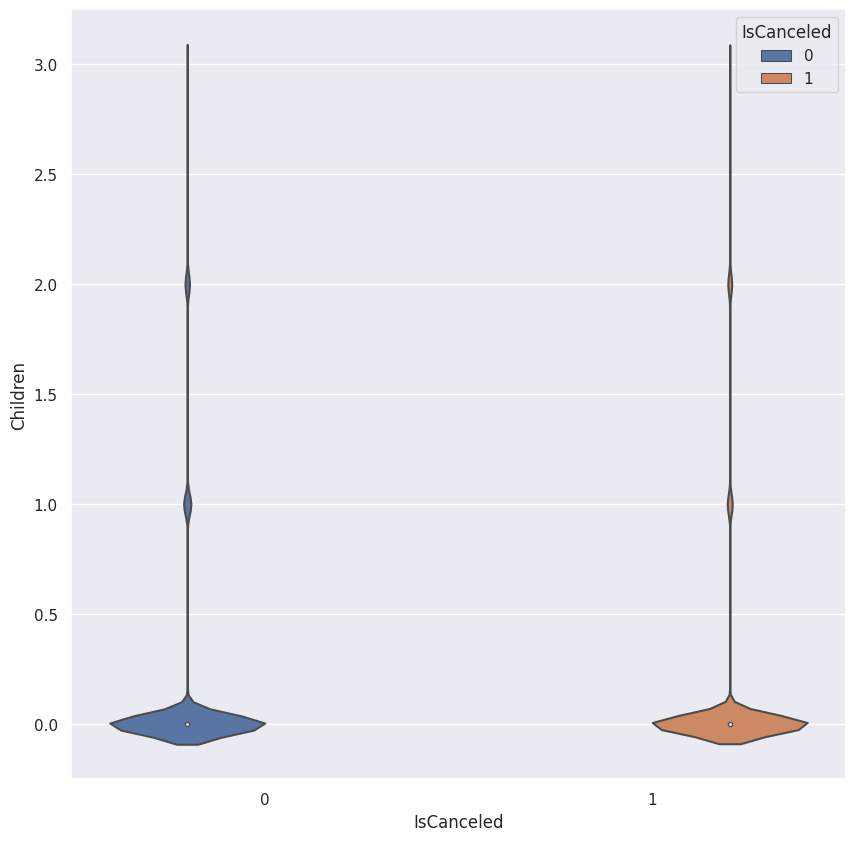

In [100]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
# plotting the violinplot to see how some columns affect the cancelation - helps us determine which columns to drop from final predictions (irrelevant ones)

#sns.violinplot(x="IsCanceled",y="ArrivalDateMonth", hue="IsCanceled", data=hotel_booking_city);
#sns.violinplot(x="IsCanceled",y="DaysInWaitingList", hue="IsCanceled", data=hotel_booking_city);
#sns.violinplot(x="IsCanceled",y="ArrivalDateWeekNumber", hue="IsCanceled", data=hotel_booking_city);
#sns.violinplot(x="IsCanceled",y="LeadTime", hue="IsCanceled", data=hotel_booking_city); #relevant
#sns.violinplot(x="IsCanceled",y="RequiredCarParkingSpaces", hue="IsCanceled", data=hotel_booking_city); #relevant for 0
sns.violinplot(x="IsCanceled",y="Children", hue="IsCanceled", data=hotel_booking_city);

plt.show()

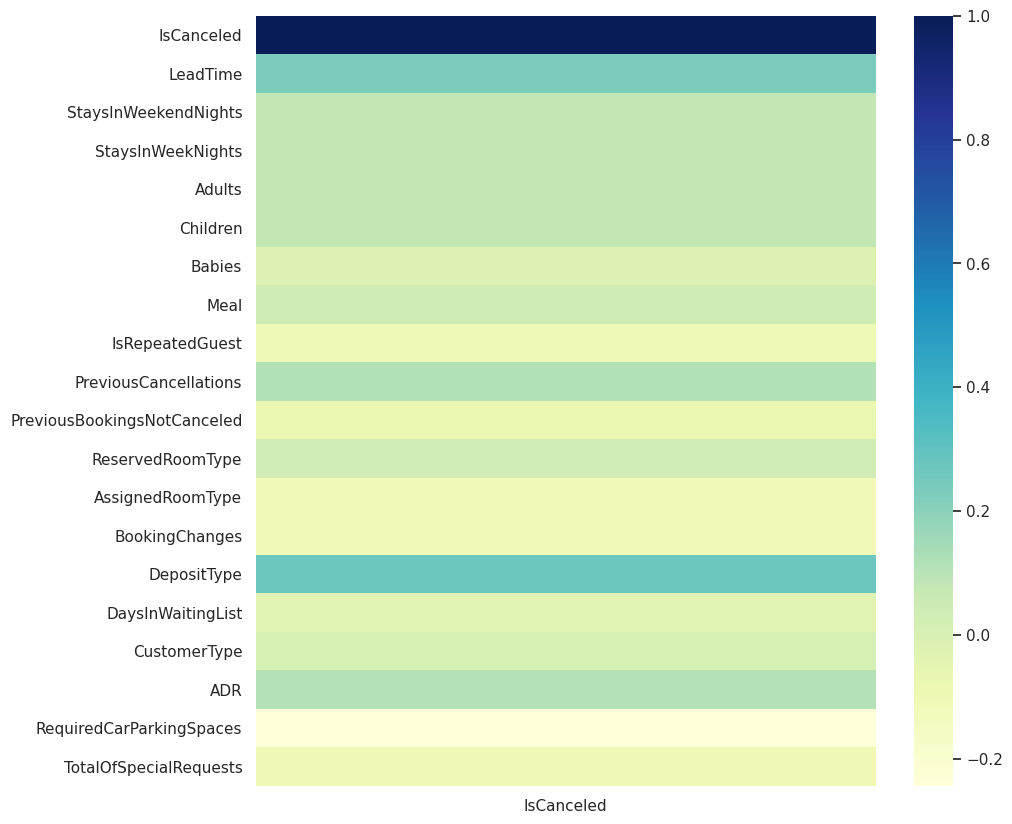

In [101]:
import seaborn as sns
correlations_booking_resort = hotel_booking_resort.corr()
sns.heatmap(correlations_booking_resort[['IsCanceled']], cmap="YlGnBu")
plt.show()

In [102]:
#we will drop some uneccesary columns 
hotel_booking_city.drop(['Agent', 'ArrivalDateDayOfMonth', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateYear', 'Company', 'Country', 'DistributionChannel', 'MarketSegment', 'ReservationStatus', 'ReservationStatusDate'], inplace=True, axis=1)
hotel_booking_city.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,0,2,1,0.0,0,2,0,0,0,0,0,0,0,0,2,0.0,0,0
1,1,88,0,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1
2,1,65,0,4,1,0.0,0,0,0,0,0,0,0,0,0,0,2,68.0,0,1
3,1,92,2,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,2
4,1,100,0,2,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1


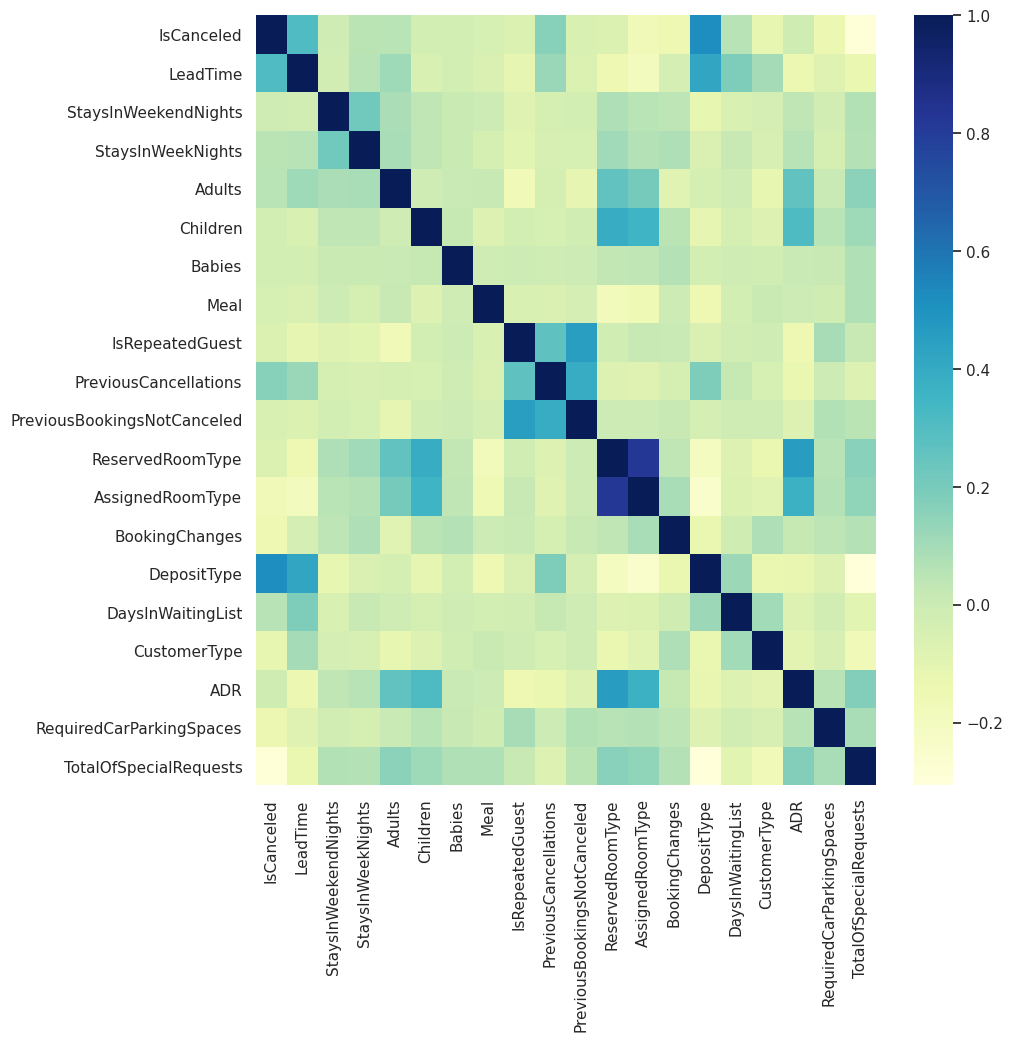

In [103]:
import seaborn as sns
correlations_booking = hotel_booking_city.corr()
sns.heatmap(correlations_booking, cmap="YlGnBu")
plt.show()

In [104]:
hotel_booking_city.isnull().sum()

IsCanceled                     0
LeadTime                       0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       4
Babies                         0
Meal                           0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
dtype: int64

In [105]:
hotel_booking_city.dtypes

IsCanceled                       int64
LeadTime                         int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                             int64
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                 int64
AssignedRoomType                 int64
BookingChanges                   int64
DepositType                      int64
DaysInWaitingList                int64
CustomerType                     int64
ADR                            float64
RequiredCarParkingSpaces         int64
TotalOfSpecialRequests           int64
dtype: object

In [106]:
hotel_booking_city = hotel_booking_city.dropna()
hotel_booking_city['Children'].isnull().sum()

0

In [107]:
#we save the clean stroke to the db

conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_city.to_sql('hotel_booking_city_clean', con=conn_sql, if_exists='replace', index=False)
hotel_booking_city_c = pd.read_sql('SELECT * FROM hotel_booking_city_clean', conn_sql)
hotel_booking_city_c.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,0,2,1,0.0,0,2,0,0,0,0,0,0,0,0,2,0.0,0,0
1,1,88,0,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1
2,1,65,0,4,1,0.0,0,0,0,0,0,0,0,0,0,0,2,68.0,0,1
3,1,92,2,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,2
4,1,100,0,2,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1


In [2]:
conn_sql = sqlite.connect('MasterAll.db')
hotel_booking_city_c = pd.read_sql('SELECT * FROM hotel_booking_city_clean', conn_sql)
hotel_booking_city_c.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,0,2,1,0.0,0,2,0,0,0,0,0,0,0,0,2,0.0,0,0
1,1,88,0,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1
2,1,65,0,4,1,0.0,0,0,0,0,0,0,0,0,0,0,2,68.0,0,1
3,1,92,2,4,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,2
4,1,100,0,2,2,0.0,0,0,0,0,0,0,0,0,0,0,2,76.5,0,1


In [8]:
hotel_booking_city_c.to_csv('dbs/hotel_booking/hotel_booking_city_clean.csv', index=False)

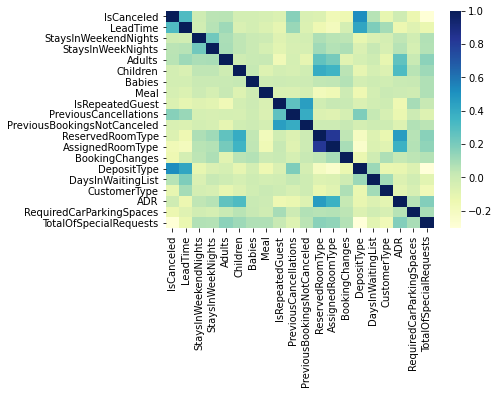

In [3]:
import seaborn as sns
correlations_booking = hotel_booking_city_c.corr()
sns.heatmap(correlations_booking, cmap="YlGnBu")
plt.show()

In [109]:
#after preprocessing we define our target and features
X = hotel_booking_city_c[['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 
      'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges',
    'DepositType', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests']]
y = hotel_booking_city_c['IsCanceled']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time

In [111]:
#Training the models and measuring duration
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [112]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 1.029
              precision    recall  f1-score   support

           0       0.75      0.92      0.83     13834
           1       0.84      0.58      0.69      9964

    accuracy                           0.78     23798
   macro avg       0.80      0.75      0.76     23798
weighted avg       0.79      0.78      0.77     23798

GaussianNB: 
 time: 0.051
              precision    recall  f1-score   support

           0       0.81      0.26      0.39     13834
           1       0.47      0.92      0.62      9964

    accuracy                           0.53     23798
   macro avg       0.64      0.59      0.51     23798
weighted avg       0.67      0.53      0.49     23798

LinearSVC: 
 time: 13.789
              precision    recall  f1-score   support

           0       0.69      1.00      0.81     13834
           1       1.00      0.37      0.53      9964

    accuracy                           0.73     23798
   macro avg       0.84      0.68      0.

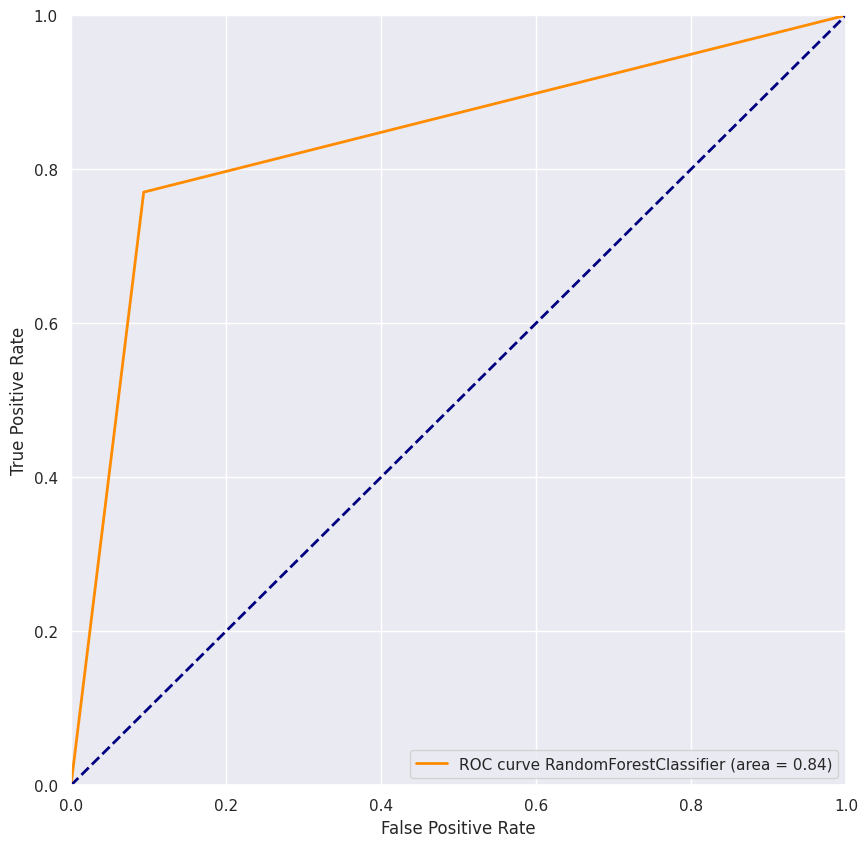

In [113]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, predictions_rfc)
auc_nb = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve RandomForestClassifier (area = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Data coupons

In [2]:
coupons = pd.read_csv('dbs/coupon_recommendation/in-vehicle-coupon-recommendation.csv')
#coupons.columns = coupons.columns.str.lower()
coupons.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
conn_sql = sqlite.connect('MasterAll.db')
coupons.to_sql('coupons', con=conn_sql, if_exists='replace', index=False)
coupons = pd.read_sql('SELECT * FROM coupons', conn_sql)
coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,None,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,None,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,None,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,None,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,None,4~8,1~3,1,1,0,0,1,0


In [10]:
conn_sql.commit()

In [11]:
#shape and dimension of dataframe coupons
print('Shape: ', coupons.shape)
print('Dimensions: ', coupons.ndim)

Shape:  (12684, 26)
Dimensions:  2


In [13]:
#checking types of data contained in dataframe
coupons.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [14]:
taken_coupon = pd.read_sql('Select sum(case when Y = 1 then 1 else 0 end) AS takenCoupon, sum(case when Y = 0 then 1 else 0 end) AS notTakenCoupon from coupons', conn_sql)
taken_coupon

,takenCoupon,notTakenCoupon
0,7210,5474


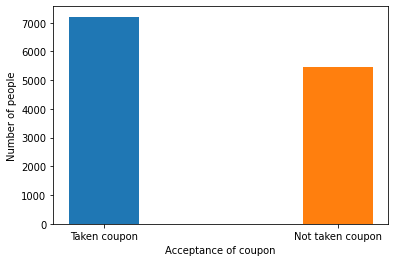

In [15]:
plt.figure()
plt.bar('Taken coupon', taken_coupon.takenCoupon, width=0.3)
plt.bar('Not taken coupon', taken_coupon.notTakenCoupon, width=0.3)
plt.ylabel('Number of people')
plt.xlabel('Acceptance of coupon')
plt.show()

In [10]:
different_coupons = pd.read_sql('Select sum(case when coupon = "Restaurant(<20)" then 1 else 0 end) AS res20, sum(case when coupon = "Coffee House" then 1 else 0 end) AS coffeeHouse, sum(case when coupon like "Carry out & Take away" then 1 else 0 end) AS carryOut, sum(case when coupon like "%Bar" then 1 else 0 end) AS bar, sum(case when coupon = "Restaurant(20-50)" then 1 else 0 end) AS res50 from coupons', conn_sql)
different_coupons


,res20,coffeeHouse,carryOut,bar,res50
0,2786,3996,2393,2017,1492


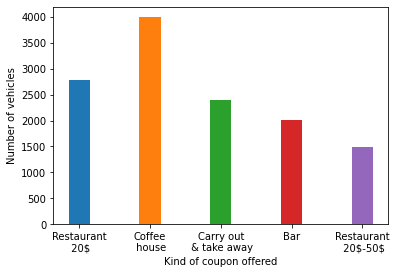

In [18]:
plt.figure()
plt.bar('Restaurant\n 20$', different_coupons.res20, width=0.3)
plt.bar('Coffee\n house', different_coupons.coffeeHouse, width=0.3)
plt.bar('Carry out\n & take away', different_coupons.carryOut, width=0.3)
plt.bar('Bar', different_coupons.bar, width=0.3)
plt.bar('Restaurant\n 20\$-50\$', different_coupons.res50, width=0.3)
plt.ylabel('Number of vehicles')
plt.xlabel('Kind of coupon offered')
plt.show()

In [17]:
#check if any column has missing/nan values
coupons.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [18]:
all_empty = pd.read_sql('select count(*) from coupons where Bar IS null and CoffeeHouse IS NULL and CarryAway IS NULL and RestaurantLessThan20 IS NULL and Restaurant20To50 IS NULL', conn_sql)
all_empty

,count(*)
0,42


In [19]:
coupons.shape

(12684, 26)

In [20]:
coupons.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [21]:
#we will remove rows containing empty values as that makes the more sense since the columns containing missing values are objects
coupons.drop('car', inplace=True, axis=1)
coupons = coupons.dropna()

coupons.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [22]:
coupons.shape

(12079, 25)

In [23]:
#conn_sql = sqlite.connect('MasterAll.db')
coupons.to_sql('coupons_clean', con=conn_sql, if_exists='replace', index=False)

coupons_c = pd.read_sql('SELECT * FROM coupons_clean', conn_sql)
coupons_c.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


   takenCoupon  notTakenCoupon
0         6877            5202


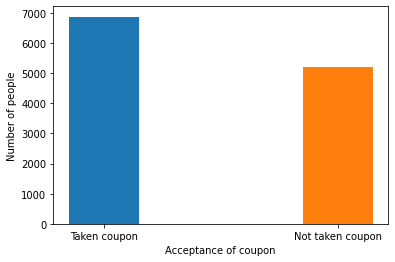

In [24]:
#we check if the ratio changed between taken and not taken coupon
taken_coupon = pd.read_sql('Select sum(case when Y = 1 then 1 else 0 end) AS takenCoupon, sum(case when Y = 0 then 1 else 0 end) AS notTakenCoupon from coupons_clean', conn_sql)
print(taken_coupon)

plt.figure()
plt.bar('Taken coupon', taken_coupon.takenCoupon, width=0.3)
plt.bar('Not taken coupon', taken_coupon.notTakenCoupon, width=0.3)
plt.ylabel('Number of people')
plt.xlabel('Acceptance of coupon')
plt.show()

In [25]:
coupons_c.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [26]:
#Columns: destination, passanger, weather, coupon, expiration, gender, - need to be changed to integer columns as scikit is used only with integers with LabelEncoder
#age,maritalStatus, education, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
replace_vals = {
    'time': {'2PM': 14, '10AM': 10, '6PM': 18, '7AM': 7, '10PM': 22},
    'expiration': {'1d': 24, '2h': 2},
    'age': {'below21': 0, '21': 1, '26': 2, '31': 3, '36': 4, '41': 5, '46': 6, '50plus': 7},
    'income': {'$37500 - $49999': 3, '$62500 - $74999': 5, '$12500 - $24999': 1, '$75000 - $87499':6,'$50000 - $62499':4, '$25000 - $37499':2, '$100000 or More':8, '$87500 - $99999':7, 'Less than $12500':0},
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CarryAway': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'RestaurantLessThan20': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
    }
coupons_c = coupons_c.replace(replace_vals)
coupons_c.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),24,Male,1,Single,...,1,3,3,1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2,Male,1,Single,...,1,3,3,1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,1,Single,...,1,3,3,1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2,Male,1,Single,...,1,3,3,1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,24,Male,1,Single,...,1,3,3,1,1,0,0,0,1,0


In [27]:
coupons_c.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                     int64
coupon                  object
expiration               int64
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                      int64
CoffeeHouse              int64
CarryAway                int64
RestaurantLessThan20     int64
Restaurant20To50         int64
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_features_coupon = ['destination', 'passanger', 'coupon', 'gender', 'maritalStatus', 'education', 'weather']
le = LabelEncoder()

for i in range(len(categorical_features_coupon)):
    new = le.fit_transform(coupons_c[categorical_features_coupon[i]])
    coupons_c[categorical_features_coupon[i]] = new

coupons_c.head() 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,14,4,24,1,1,2,...,1,3,3,1,1,0,0,0,1,1
1,1,1,2,80,10,2,2,1,1,2,...,1,3,3,1,1,0,0,0,1,0
2,1,1,2,80,10,0,24,1,1,2,...,1,3,3,1,1,0,0,0,1,1
3,1,1,2,80,10,1,2,1,1,2,...,1,3,3,1,1,1,0,0,1,0
4,1,1,2,80,14,2,24,1,1,2,...,1,3,3,1,1,0,0,0,1,0


In [29]:
nes = pd.read_sql('Select distinct toCoupon_GEQ5min from coupons_clean', conn_sql)
nes

,toCoupon_GEQ5min
0,1


In [30]:
coupons_c.drop('toCoupon_GEQ5min', inplace=True, axis=1)
coupons_c.drop('occupation', inplace=True, axis=1)

In [31]:
#conn_sql = sqlite.connect('MasterAll.db')
coupons_c.to_sql('coupons_clean', con=conn_sql, if_exists='replace', index=False)

coupons_c_le = pd.read_sql('SELECT * FROM coupons_clean', conn_sql)
coupons_c_le.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,14,4,24,1,1,2,...,0,1,3,3,1,0,0,0,1,1
1,1,1,2,80,10,2,2,1,1,2,...,0,1,3,3,1,0,0,0,1,0
2,1,1,2,80,10,0,24,1,1,2,...,0,1,3,3,1,0,0,0,1,1
3,1,1,2,80,10,1,2,1,1,2,...,0,1,3,3,1,1,0,0,1,0
4,1,1,2,80,14,2,24,1,1,2,...,0,1,3,3,1,0,0,0,1,0


In [32]:
conn_sql.commit()

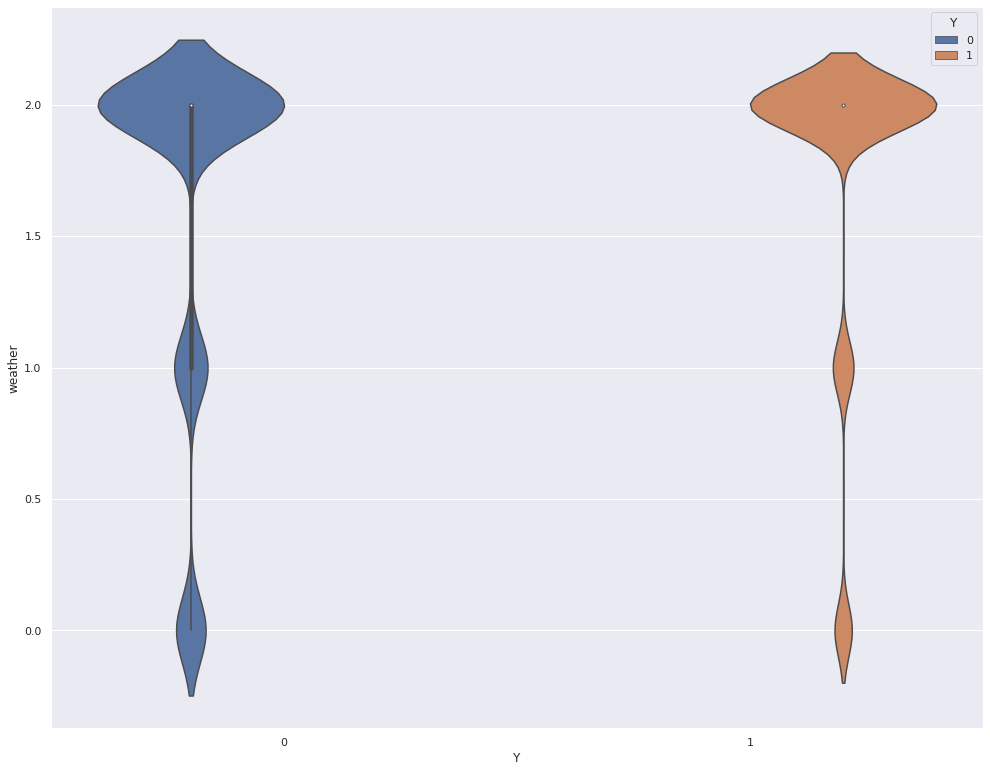

In [33]:
#visualizing the data
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(16.7,13.27)})
# plotting the violinplot

#sns.violinplot(x="Y",y="maritalStatus", hue="Y", data=coupons_c_le); #unimportant
#sns.violinplot(x="Y",y="has_children", hue="Y", data=coupons_c_le);  #unimportant
#sns.violinplot(x="Y",y="passanger", hue="Y", data=coupons_c_le);
#sns.violinplot(x="Y",y="destination", hue="Y", data=coupons_c_le);
#sns.violinplot(x="Y",y="time", hue="Y", data=coupons_c_le);
sns.violinplot(x="Y",y="weather", hue="Y", data=coupons_c_le);


plt.show()

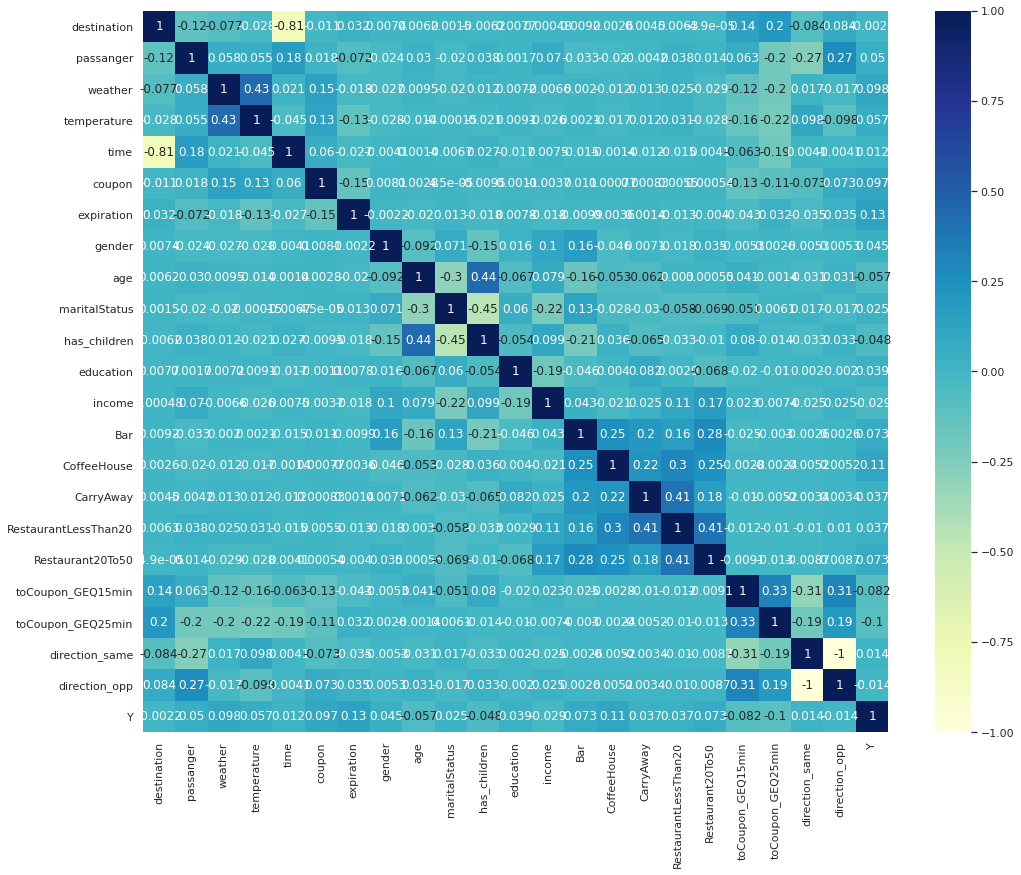

In [34]:
correlations = coupons_c_le.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=True)
plt.show()

In [35]:
coupons_c_le.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [36]:
#after preprocessing we define our target and features
coupons_bar = pd.read_sql('Select * from coupons_clean where coupon = 0', conn_sql)
coupons_restaurant = pd.read_sql('Select * from coupons_clean where coupon in (3,4)', conn_sql)
coupons_carry_away = pd.read_sql('Select * from coupons_clean where coupon = 1', conn_sql)
coupons_coffee = pd.read_sql('Select * from coupons_clean where coupon = 2', conn_sql)

In [37]:
X = coupons_c_le[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'Bar', 'CarryAway', 'CoffeeHouse', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y = coupons_c_le['Y']

X_bar = coupons_bar[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'Bar', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_bar = coupons_bar['Y']

X_restaurant = coupons_restaurant[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_restaurant = coupons_restaurant['Y']

X_carry_away = coupons_carry_away[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'CarryAway', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_carry_away = coupons_carry_away['Y']

X_coffee = coupons_coffee[['destination', 'passanger', 'weather', 'expiration', 'gender', 'age', 'education', 'income', 'coupon', 
        'CoffeeHouse', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]
y_coffee = coupons_coffee['Y']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 7

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time


## Over all data

In [ ]:
#Training the models and measuring duration over all cleaned data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

In [ ]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

## Bar

In [39]:
#Training the models and measuring duration
x_train, x_test, y_train, y_test = train_test_split(X_bar, y_bar, test_size=test_size, random_state=seed)

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [40]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 0.124
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       346
           1       0.70      0.54      0.61       228

    accuracy                           0.72       574
   macro avg       0.72      0.69      0.70       574
weighted avg       0.72      0.72      0.72       574

GaussianNB: 
 time: 0.005
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       346
           1       0.60      0.55      0.58       228

    accuracy                           0.68       574
   macro avg       0.66      0.66      0.66       574
weighted avg       0.67      0.68      0.68       574

LinearSVC: 
 time: 0.251
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       346
           1       0.74      0.42      0.54       228

    accuracy                           0.71       574
   macro avg       0.72      0.66      0.6

## Restaurant

In [41]:
#Training the models and measuring duration
x_train, x_test, y_train, y_test = train_test_split(X_restaurant, y_restaurant, test_size=test_size, random_state=seed)
start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [42]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 0.130
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       460
           1       0.73      0.81      0.77       761

    accuracy                           0.70      1221
   macro avg       0.67      0.66      0.66      1221
weighted avg       0.69      0.70      0.69      1221

GaussianNB: 
 time: 0.006
              precision    recall  f1-score   support

           0       0.60      0.35      0.44       460
           1       0.69      0.86      0.76       761

    accuracy                           0.67      1221
   macro avg       0.64      0.61      0.60      1221
weighted avg       0.65      0.67      0.64      1221

LinearSVC: 
 time: 0.188
              precision    recall  f1-score   support

           0       0.64      0.41      0.50       460
           1       0.71      0.86      0.78       761

    accuracy                           0.69      1221
   macro avg       0.68      0.64      0.6

## Carry out & take away

In [43]:
#Training the models and measuring duration
x_train, x_test, y_train, y_test = train_test_split(X_carry_away, y_carry_away, test_size=test_size, random_state=seed)

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [44]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 0.099
              precision    recall  f1-score   support

           0       0.44      0.09      0.14       174
           1       0.76      0.96      0.85       510

    accuracy                           0.74       684
   macro avg       0.60      0.52      0.50       684
weighted avg       0.68      0.74      0.67       684

GaussianNB: 
 time: 0.010
              precision    recall  f1-score   support

           0       0.29      0.20      0.23       174
           1       0.75      0.83      0.79       510

    accuracy                           0.67       684
   macro avg       0.52      0.51      0.51       684
weighted avg       0.63      0.67      0.65       684

LinearSVC: 
 time: 0.113
              precision    recall  f1-score   support

           0       0.30      0.20      0.24       174
           1       0.75      0.84      0.79       510

    accuracy                           0.68       684
   macro avg       0.53      0.52      0.5

## Coffee House 

In [45]:
#Training the models and measuring duration
x_train, x_test, y_train, y_test = train_test_split(X_coffee, y_coffee, test_size=test_size, random_state=seed)

start_time_lr = time.time()
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_nb = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb = nb.predict(x_test)
elapsed_time_nb = time.time() - start_time_nb

start_time_svc = time.time()
svc = LinearSVC().fit(x_train, y_train)
predictions_svc = svc.predict(x_test)
elapsed_time_svc = time.time() - start_time_svc

start_time_knn = time.time()
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtc = time.time()
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc = dtc.predict(x_test)
elapsed_time_dtc = time.time() - start_time_dtc

start_time_rfc = time.time()
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc = rfc.predict(x_test)
elapsed_time_rfc = time.time() - start_time_rfc

start_time_gbc = time.time()
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc = gbc.predict(x_test)
elapsed_time_gbc = time.time() - start_time_gbc

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [46]:
print(f"Logistic regression: \n time: %.3f" % elapsed_time_lr)
print(classification_report(y_test, predictions_lr))

print("GaussianNB: \n time: %.3f" % elapsed_time_nb)
print(classification_report(y_test, predictions_nb))

print("LinearSVC: \n time: %.3f" % elapsed_time_svc)
print(classification_report(y_test, predictions_svc))

print("KNeighborsClassifier: \n time: %.3f" % elapsed_time_knn)
print(classification_report(y_test, predictions_knn))

print("DecisionTreeClassifier: \n time: %.3f" % elapsed_time_dtc)
print(classification_report(y_test, predictions_dtc))

print("RandomForestClassifier: \n time: %.3f" % elapsed_time_rfc)
print(classification_report(y_test, predictions_rfc))

print("GradientBoostingClassifier: \n time: %.3f" % elapsed_time_gbc)
print(classification_report(y_test, predictions_gbc))

Logistic regression: 
 time: 0.127
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       569
           1       0.67      0.65      0.66       576

    accuracy                           0.67      1145
   macro avg       0.67      0.67      0.67      1145
weighted avg       0.67      0.67      0.67      1145

GaussianNB: 
 time: 0.010
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       569
           1       0.65      0.73      0.69       576

    accuracy                           0.67      1145
   macro avg       0.67      0.67      0.67      1145
weighted avg       0.67      0.67      0.67      1145

LinearSVC: 
 time: 0.200
              precision    recall  f1-score   support

           0       0.69      0.51      0.58       569
           1       0.61      0.77      0.68       576

    accuracy                           0.64      1145
   macro avg       0.65      0.64      0.6